In [6]:
import pandas as pd


In [7]:
Dataset=pd.read_csv("House_Prediction.csv")

In [8]:
Dataset.columns

Index(['Location', 'Bedrooms', 'Bathrooms', 'SquareFeet', 'Price'], dtype='object')

In [9]:
Dataset=pd.get_dummies(Dataset,drop_first=True)

In [10]:
print(Dataset.head(10))

   Bedrooms  Bathrooms  SquareFeet   Price  Location_Florida  \
0         3          2        1500  250000              True   
1         4          3        2500  550000             False   
2         3          2        2000  300000             False   
3         2          1         800  450000             False   
4         5          4        3500  650000             False   
5         4          3        2200  400000              True   
6         2          1        1000  200000             False   
7         3          2        1800  470000             False   
8         4          3        2100  750000             False   
9         3          2        1400  350000             False   

   Location_Illinois  Location_New York  Location_Texas  
0              False              False           False  
1              False              False           False  
2              False              False            True  
3              False               True           False  
4    

In [11]:
Dataset.columns

Index(['Bedrooms', 'Bathrooms', 'SquareFeet', 'Price', 'Location_Florida',
       'Location_Illinois', 'Location_New York', 'Location_Texas'],
      dtype='object')

In [36]:
Indepedent=Dataset[['Bedrooms', 'Bathrooms', 'SquareFeet','Location_Florida','Location_Illinois', 'Location_New York', 'Location_Texas']]
print(Indepedent.head(10))
Dependent=Dataset[['Price']]
print(Dependent)

   Bedrooms  Bathrooms  SquareFeet  Location_Florida  Location_Illinois  \
0         3          2        1500              True              False   
1         4          3        2500             False              False   
2         3          2        2000             False              False   
3         2          1         800             False              False   
4         5          4        3500             False               True   
5         4          3        2200              True              False   
6         2          1        1000             False              False   
7         3          2        1800             False              False   
8         4          3        2100             False              False   
9         3          2        1400             False               True   

   Location_New York  Location_Texas  
0              False           False  
1              False           False  
2              False            True  
3               Tr

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(Indepedent,Dependent,test_size=0.30,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [63]:
from sklearn.linear_model import LinearRegression
LinearRegression=LinearRegression()
LinearRegression.fit(X_train,Y_train)

LinearRegression()

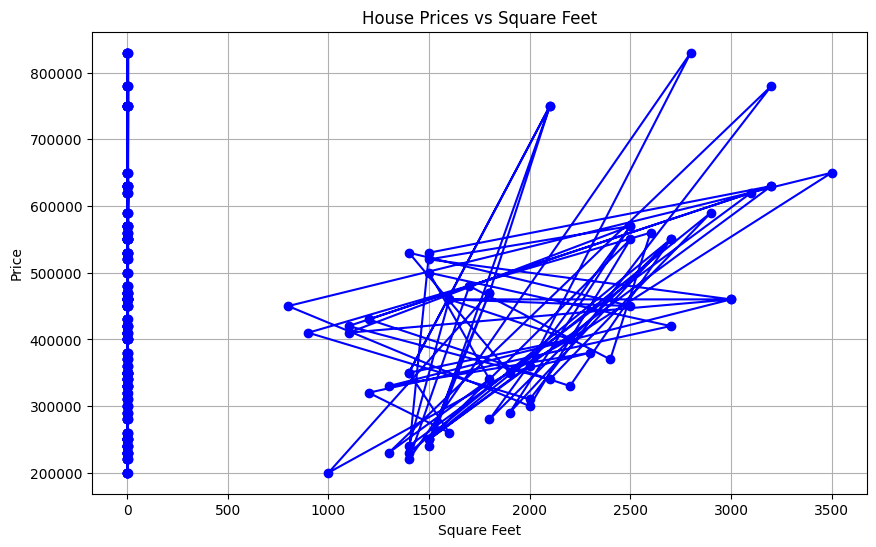

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(Indepedent,Dependent, marker='o', linestyle='-', color='b')
plt.title('House Prices vs Square Feet')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [65]:
Y_Pred=LinearRegression.predict(X_test)

In [59]:
from sklearn.metrics import r2_score
r_score=r2_score(Y_Pred,Y_test)
print(r_score)

0.9582078766849009


In [66]:
import pickle
Filename="finalize_House_prediction.sav"
pickle.dump(LinearRegression,open(Filename,'wb'))

In [67]:
loaded_model=pickle.load(open('finalize_House_prediction.sav','rb'))
result=loaded_model.predict([[4,3,2000,True,False,False,False]])
print(result)

[[387085.04939447]]


c:\Users\Gajalakshmi G\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
